https://github.com/pytorch/examples/tree/master/mnist

# PyTorch Data Preprocess

In [1]:
import torch

from torchvision import datasets, transforms

### Data Loader 부르기

파이토치는 DataLoader를 불러 model에 넣음<br>
- 이게 중요한 파트!!
- 이게 파이토치의 큰 장점!!

In [2]:
batch_size = 32
test_batch_size = 32

In [6]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', # 다운 dir
                   train=True, # train 용도
                   download=True,# 없으면 다운
                   transform=transforms.Compose([
                       transforms.ToTensor(), # tensor로 바꾼다.
                       transforms.Normalize(mean=(0.5,), std=(0.5,)) # 0~1까지 숫자로 바꾼다.
                   ])),
    batch_size=batch_size, # train 할 때 batch_size 가져온다.
    shuffle=True)

In [7]:
# train_loader 를 실행했기에 data는 있음을 안다. 따라서 download 필요 없음
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', # 다운 dir
                   train=False, # train 용도 아님
                   transform=transforms.Compose([
                       transforms.ToTensor(), # tensor로 바꾼다.
                       transforms.Normalize((0.5,), (0.5,)) # 0~1까지 숫자로 바꾼다.
                   ])),
    batch_size=test_batch_size, # test 할 때 test_batch_size 가져온다.
    shuffle=True)

### 첫번재 iteration에서 나오는 데이터 확인

In [8]:
images, labels = next(iter(train_loader))

PyTorch는 TensorFlow와 다르게 [Batch Size, Channel, Height, Width] 임을 명시해야함

In [9]:
# batch_size, channel, h, w 순서
images.shape

torch.Size([32, 1, 28, 28])

In [10]:
labels.shape

torch.Size([32])

### 데이터 시각화

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# 한줄로 만듬
# 2차원의 그림으로 보기 위해서 필요없는 channel을 지워서 2차원으로 만듬
torch_image = torch.squeeze(images[0]) 

In [16]:
images[0].shape

torch.Size([1, 28, 28])

In [14]:
torch_image.shape

torch.Size([28, 28])

In [17]:
# numpy arr여야 plt로 그림을 그릴 수 있음
image = torch_image.numpy()

In [18]:
label = labels[0].numpy()

In [20]:
label.shape

()

In [21]:
label

array(9, dtype=int64)

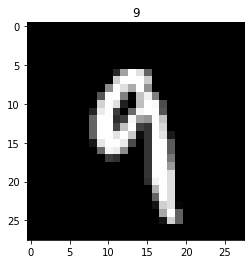

In [22]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()